# Exploratory data analysis

**The goal** of this step is to conduct an Exploratory Data Analysis (EDA) to identify key patterns in the data, with a primary focus 
on uncovering the features that distinguish 'claim' videos from 'opinion' videos. It follows Google's PACE strategy

#### PACE: Plan
Identify any outliers:
*   The methods that can be used for identifying outliers
*   Determine whether to keep or exclude outliers from the model

### This activity has 3 parts
**Part 1:** Imports, links, and loading<br>
**Part 2:** Build visualizations<br>
**Part 3:** Evaluate and share results

**Part 1:** Imports, links, and loading

In [23]:
### ** Imports, links, and loading**
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

# Suppress specific FutureWarnings from Seaborn
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

### PACE: Construct
**Part 2:** Build visualizations
**Objective**: Examine distributions and spreads of key variables, then assess their ability to distinguish **claim** vs. **opinion** videos through stratified analysis. Identify promising features for modeling. </br>

**Variables:** <br>
1 video_duration_sec <br>
2 video_view_count <br>
3 video_like_count <br>
4 video_comment_count <br>

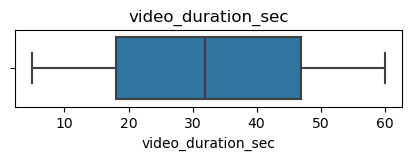

In [41]:
# 1a:Boxplot of 'video_duration_sec' for all videos
plt.figure(figsize=(5,1))
plt.title('video_duration_sec')
sns.boxplot(x=data['video_duration_sec']);

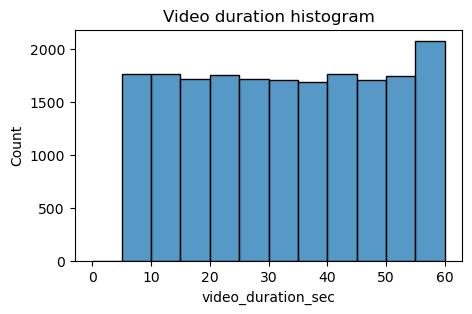

In [42]:
#1b:Histogram of 'video_duration_sec' for all videos
plt.figure(figsize=(5,3))
sns.histplot(data['video_duration_sec'], bins=range(0,61,5))
plt.title('Video duration histogram');

#### Overall Distribution Insights (All Videos)
- Left-skewed distribution with a pronounced peak at 60 seconds (platform maximum).
- Median ≈ 33 seconds; IQR ≈ 20–45 seconds.
- Driven largely by creators maximizing allowed video length.

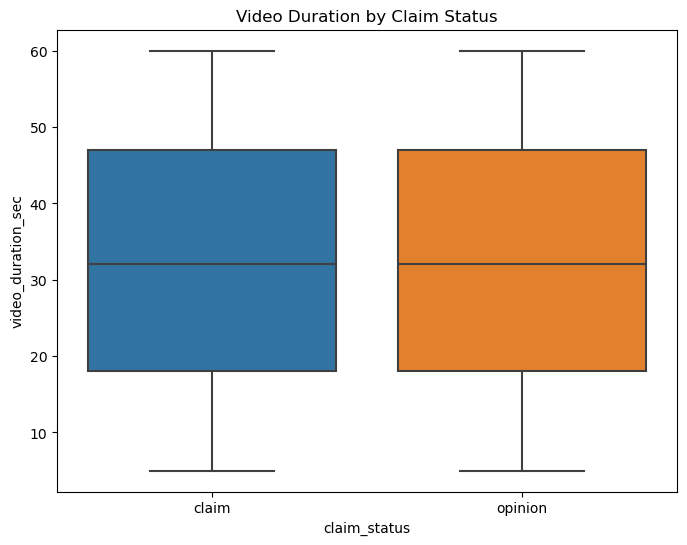

In [43]:
#1c:Stratified boxplot of 'video_duration_sec'
plt.figure(figsize=(8, 6))
sns.boxplot(x='claim_status', y='video_duration_sec', data=data)
plt.title('Video Duration by Claim Status')
plt.show()

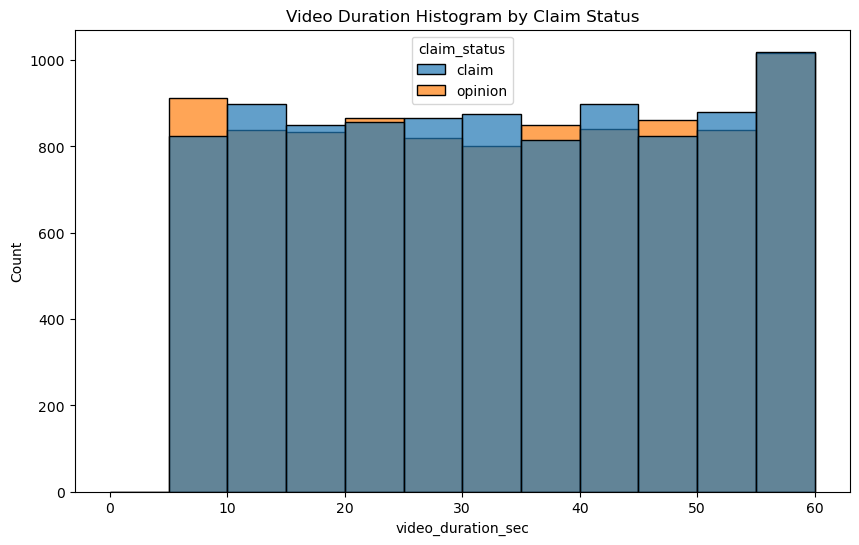

In [44]:
# 1d:Stratified histogram (overlaid) of 'video_duration_sec'
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='video_duration_sec', hue='claim_status', bins=range(0, 61, 5), multiple='layer', alpha=0.7)
plt.title('Video Duration Histogram by Claim Status')
plt.show()

### Video Duration: Stratified Analysis & Modeling Implication

**Boxplot Insights**:
- Distributions for **claim** and **opinion** videos are nearly identical.
- Both have median ≈ 32–35 seconds.
- IQR ≈ 20–45 seconds for both classes.
- Full range ~6–60 seconds (platform bounds), with whiskers extending to min/max.

**Histogram Insights** (overlaid):
- Both claim (blue) and opinion (orange) videos follow the same left-skewed pattern: relatively even counts from ~10–50 seconds, with a sharp peak at the 60-second maximum.
- No meaningful separation between classes — the orange and blue bars overlap almost completely across all bins.

**Implication for Claim vs. Opinion Classification**:
Video duration shows **no differentiating power** between claim and opinion videos. The distributions are effectively identical, driven primarily by platform constraints (creators maximizing allowed length) rather than content type.

`video_duration_sec` can safely be deprioritized or excluded from modeling — it adds no discriminatory signal compared to stronger predictors like engagement metrics (`video_view_count`, `likes_per_view`) and `author_ban_status`.ed in modeling.

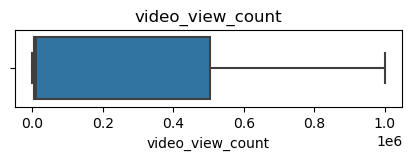

In [45]:
# 2a:Box plot of 'view_count' for all videos
plt.figure(figsize=(5,1))
plt.title('video_view_count')
sns.boxplot(x=data['video_view_count']);

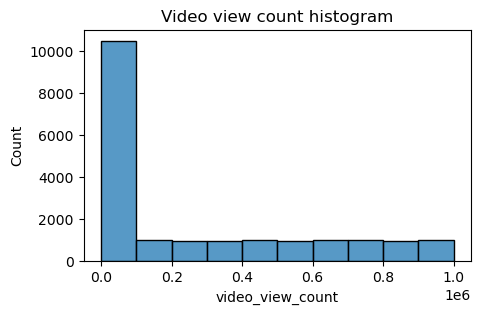

In [46]:
# 2b:Histogram of 'view_count' for all videos
plt.figure(figsize=(5,3))
sns.histplot(data['video_view_count'], bins=range(0,(10**6+1),10**5))
plt.title('Video view count histogram');

### Overall Distribution Insights
- Strongly right-skewed distribution with median near the lower end (~5–10k views).
- Vast majority of videos have low view counts; a small number exhibit extremely high views (outliers >1e6ty.

Stratified analysis by `claim_status` is needed to determine if `video_view_count` provides discriminatory power for distinguishing claim vs. opinion videos.gth

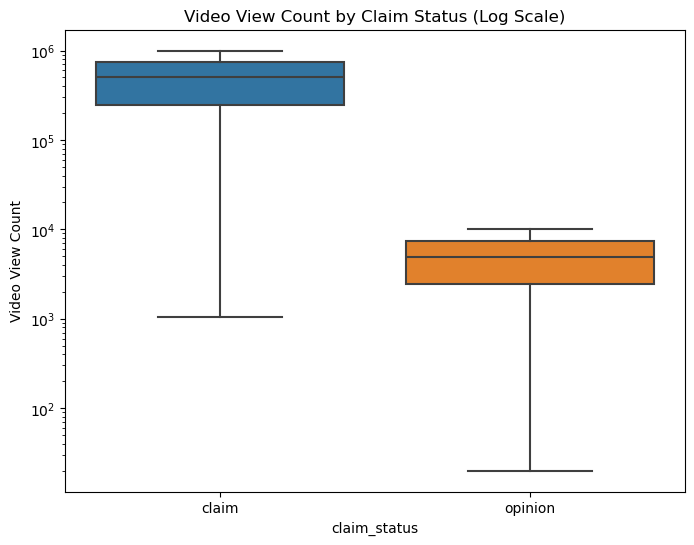

In [54]:
#2c:Stratified Boxplot by Claim Status 
plt.figure(figsize=(8, 6))
sns.boxplot(x='claim_status', y='video_view_count', data=data)
plt.yscale('log')  # Critical for visibility
plt.title('Video View Count by Claim Status (Log Scale)')
plt.ylabel('Video View Count')
plt.show()

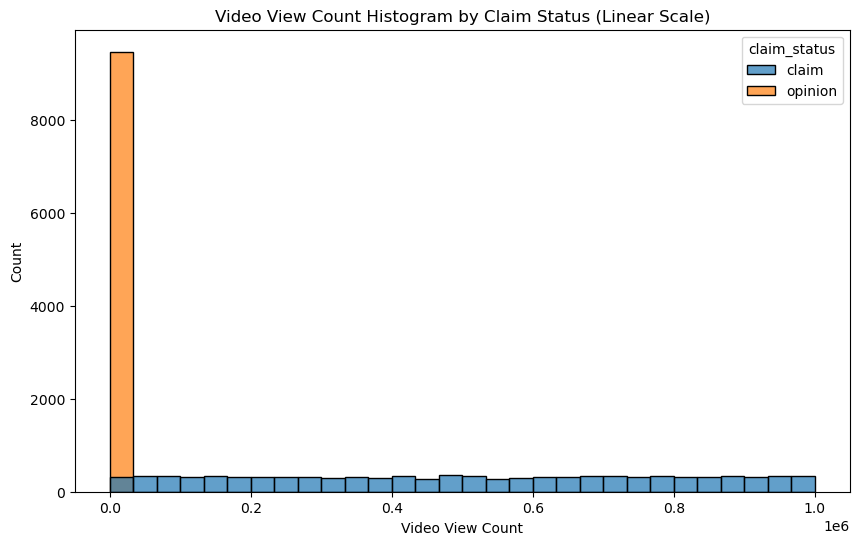

In [57]:
# 2d. Stratified Histogram by Claim Status (LINEAR scale - no log)
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='video_view_count', hue='claim_status', bins=30, multiple='layer', alpha=0.7)
plt.title('Video View Count Histogram by Claim Status (Linear Scale)')
plt.xlabel('Video View Count')
plt.ylabel('Count')
plt.show()

### Video Count: Stratified Analysis & Modeling Implication
- The vast majority of videos (~90–95% of low-view videos, <50k–100k views) are **opinion** videos — forming the massive left block.
- **Claim** videos are present in low-view bins but **dominate the high-view tail** (>100k views): nearly all videos with substantial or viral viewership are claims.

**Conclusion**:  
`video_view_count` exhibits extreme discriminatory power. Low-visibility content is overwhelmingly opinions, while high-visibility (viral) content is almost exclusively claims. This suggests the platform algorithm amplifies claim-based videos significantly.

Retain as a **top-priority feature** for modeling. Optional log transformation can be applied during preprocessing to reduce skew, but the raw variable already provides strong separation.

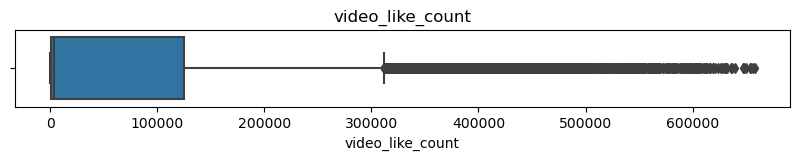

In [58]:
# 3a:Box plot of 'video_like_count' for all videos
plt.figure(figsize=(10,1))
plt.title('video_like_count')
sns.boxplot(x=data['video_like_count']);


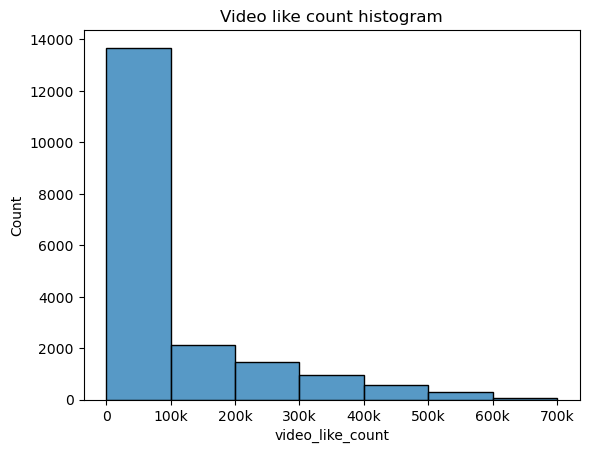

In [59]:
# 3b:Histogram of 'video_like_count' for all videos
ax = sns.histplot(data['video_like_count'], bins=range(0,(7*10**5+1),10**5))
labels = [0] + [str(i) + 'k' for i in range(100, 701, 100)]
ax.set_xticks(range(0,7*10**5+1,10**5), labels=labels)
plt.title('Video like count histogram');


### Overall Distribution Insights
- Strongly right-skewed with extreme outliers extending beyond 600k likes.
- Median near the lower end (~1k–10k likes); vast majority of videos receive few likes. <br>
- Right-skewed distribution: peak at low likes (0–100k), sharp drop-off, long tail to 700k+.
- Most videos garner limited likes; a small subset receive massive engagement.

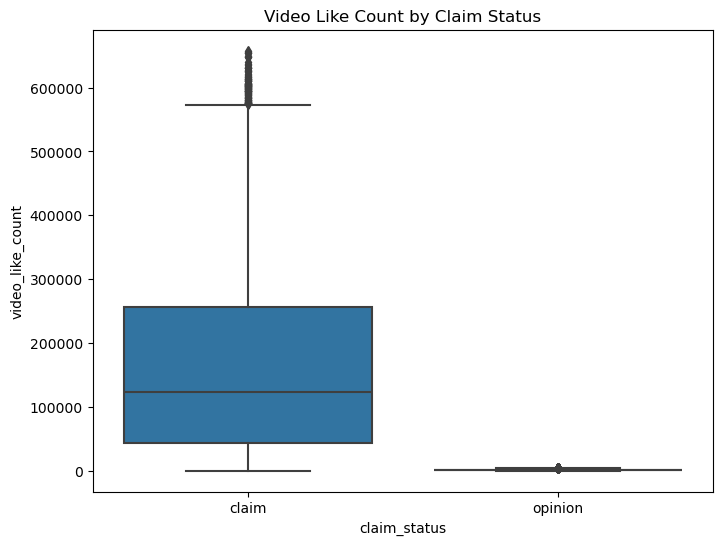

In [60]:
#3c:Stratified box plot of 'video_like_count'
plt.figure(figsize=(8, 6))
sns.boxplot(x='claim_status', y='video_like_count', data=data)
plt.title('Video Duration by Claim Status')
plt.show()

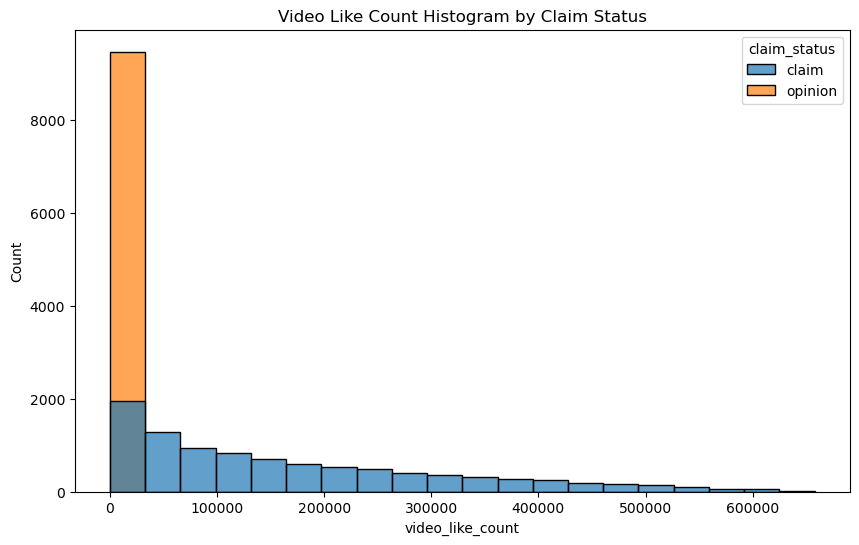

In [64]:
# 3d:Stratified histogram (overlaid) of 'video_like_count'
plt.figure(figsize=(10, 6))
# Changed bins to an integer (20) to let Seaborn auto-detect the range
sns.histplot(data=data, x='video_like_count', hue='claim_status', bins=20, multiple='layer', alpha=0.7)
plt.title('Video Like Count Histogram by Claim Status')
plt.show()

### Video Like Count: Stratified Analysis & Modeling Implication
video_like_count` shows very strong class separation:
- Low-like videos are overwhelmingly opinions.
- High-like videos (>100k likes) are predominantly (nearly exclusively) claims.

This mirrors the view count pattern: claim content drives significantly higher user engagement (likes as a reaction to controversial/factual assertions).

**Conclusion**: Excellent predictor — retain alongside `video_view_count`. The consistent high-engagement signal for claims reinforces algorithmic amplification of claim-based videos. Log transformation recommended for modeling to handle skew.

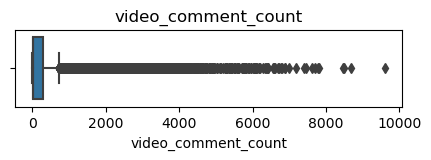

In [65]:
# 4a:Box plot of 'video_comment_count' for all videos
plt.figure(figsize=(5,1))
plt.title('video_comment_count')
sns.boxplot(x=data['video_comment_count']);


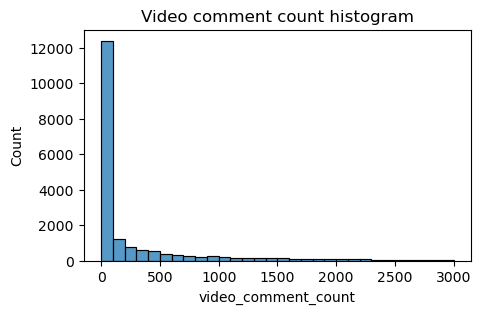

In [66]:
# 4b:Histogram of 'video_comment_count' for all videos
plt.figure(figsize=(5,3))
sns.histplot(data['video_comment_count'], bins=range(0,(3001),100))
plt.title('Video comment count histogram');


### Overall Distribution Insights
- Strongly right-skewed with extreme outliers extending beyond 10,000 comments.
- Median near zero; most videos receive very few comments.
- Sharp peak at low comment counts (0–300), rapid drop-off, long tail to ~10,000+.
- Vast majority of videos generate minimal discussion.
- Highly skewed engagement metric, consistent with views and likes — most content receives little discussion.

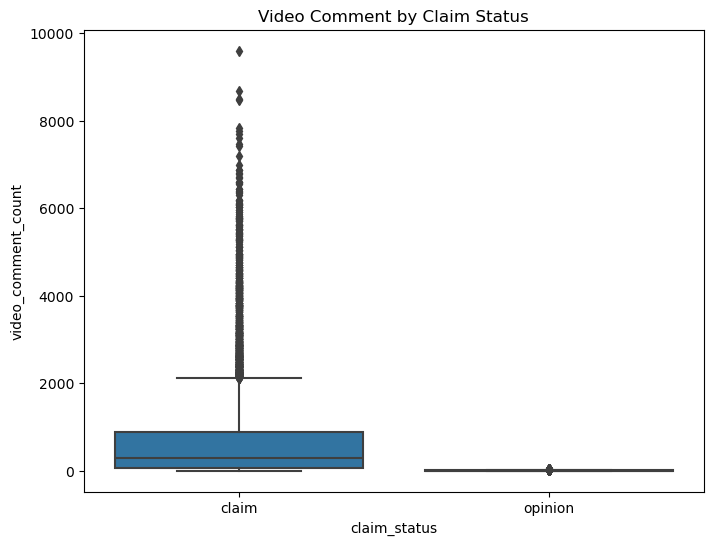

In [67]:
#4c:Stratified box plot of 'video_comment_count'
plt.figure(figsize=(8, 6))
sns.boxplot(x='claim_status', y='video_comment_count', data=data)
plt.title('Video Comment by Claim Status')
plt.show()

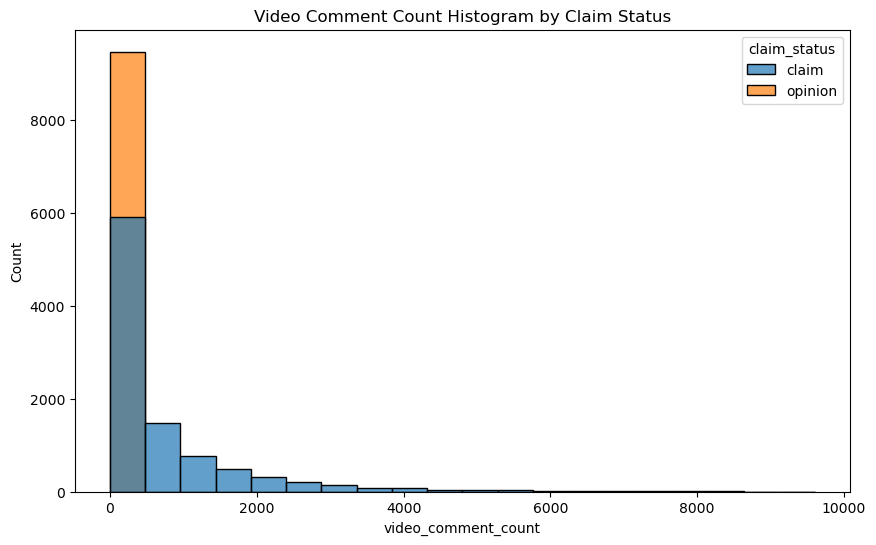

In [68]:
# 4d:Stratified histogram (overlaid) of 'video_comment_count'
plt.figure(figsize=(10, 6))
# Changed bins to an integer (20) to let Seaborn auto-detect the range
sns.histplot(data=data, x='video_comment_count', hue='claim_status', bins=20, multiple='layer', alpha=0.7)
plt.title('Video Comment Count Histogram by Claim Status')
plt.show()

### Video Comment Count: Stratified Analysis & Modeling Implication
video_comment_count` shows **strong class separation**, aligning with views and likes:
- Low-comment videos are predominantly opinions.
- High-comment videos (>500–1,000 comments) are almost entirely claims.

This reinforces the pattern: claim content generates stronger user reactions and discussion.

**Conclusion**: Good predictor — retain for modeling. The consistent high-engagement signal across views, likes, and comments suggests claim videos are more controversial/interactive. Log transformation recommended to handle skew.

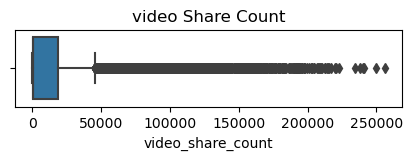

In [69]:
# 5a:Box plot of 'video_share_count' for all videos
plt.figure(figsize=(5,1))
plt.title('video Share Count')
sns.boxplot(x=data['video_share_count']);


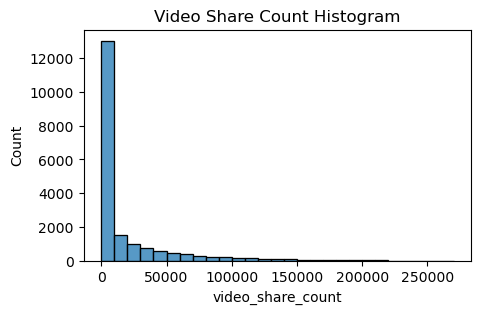

In [70]:
# 5b:Histogram of 'video_share_count' for all videos
plt.figure(figsize=(5,3))
sns.histplot(data['video_share_count'], bins=range(0,(270001),10000))
plt.title('Video Share Count Histogram');


### Overall Distribution Insights
- Strongly right-skewed with extreme outliers extending beyond 250,000 shares.
- Median near zero; most videos are rarely shared.
- Sharp peak at low share counts (0–50k), rapid drop-off, long tail to 250k+.
- Vast majority of videos have minimal sharing activity

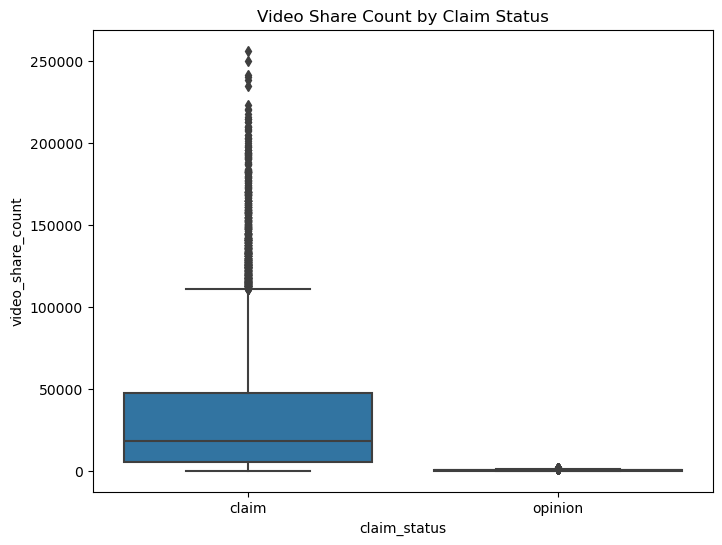

In [71]:
# 5c:Stratified box plot of 'video_share_count'
plt.figure(figsize=(8, 6))
sns.boxplot(x='claim_status', y='video_share_count', data=data)
plt.title('Video Share Count by Claim Status')
plt.show()

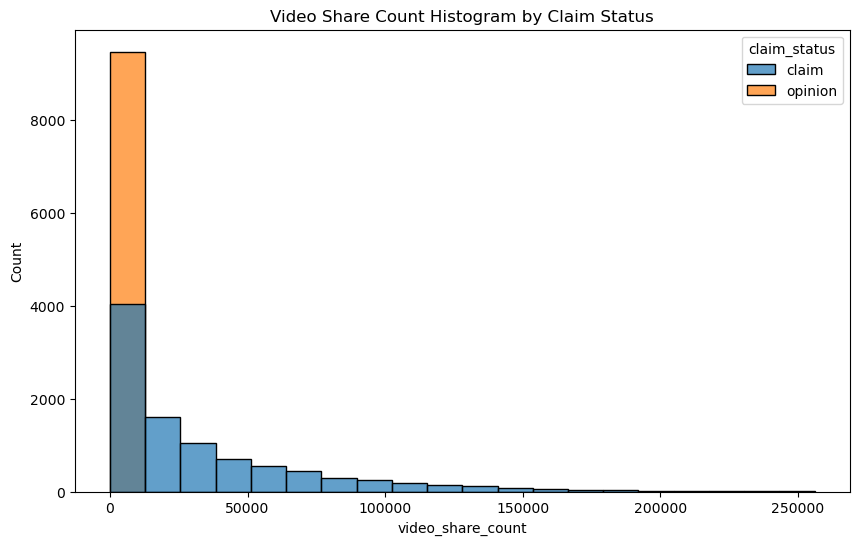

In [72]:
# 5d:Stratified histogram (overlaid) of 'video_share_count'
plt.figure(figsize=(10, 6))
# Changed bins to an integer (20) to let Seaborn auto-detect the range
sns.histplot(data=data, x='video_share_count', hue='claim_status', bins=20, multiple='layer', alpha=0.7)
plt.title('Video Share Count Histogram by Claim Status')
plt.show()

### Video Share Count: Stratified Analysis & Modeling Implication
video_share_count` shows **strong class separation**, reinforcing the pattern across all engagement metrics:
- Low-share videos are overwhelmingly opinions.
- High-share videos (>50k shares) are predominantly claims.

Sharing appears to be a strong indicator of viral/controversial content.

**Conclusion**: Valuable predictor — retain for modeling. The uniform high-engagement signal (views, likes, comments, shares) for claims suggests claim videos are more likely to spread rapidly on the platform. Log transformation recommended to manage skew.

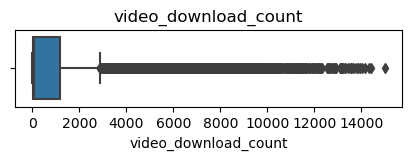

In [74]:
# 6a:Box plot of 'video_download_count' for all videos
plt.figure(figsize=(5,1))
plt.title('video_download_count')
sns.boxplot(x=data['video_download_count']);

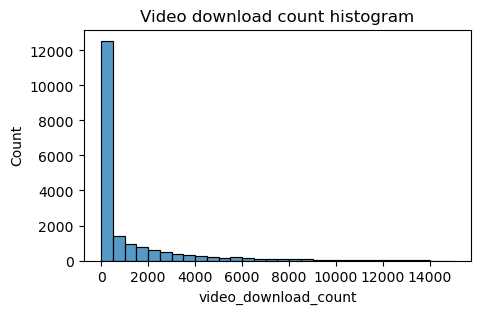

In [75]:
# 6b:Histogram of 'video_download_count' for all videos
plt.figure(figsize=(5,3))
sns.histplot(data['video_download_count'], bins=range(0,(15001),500))
plt.title('Video download count histogram');

### Overall Distribution Insights
- Strongly right-skewed with extreme outliers extending beyond 14,000 downloads.
- Median near zero; most videos are rarely downloaded.
- Sharp peak at low download counts (0–2,000), rapid drop-off, long tail to 14,000+.
- Vast majority of videos have minimal download activity.

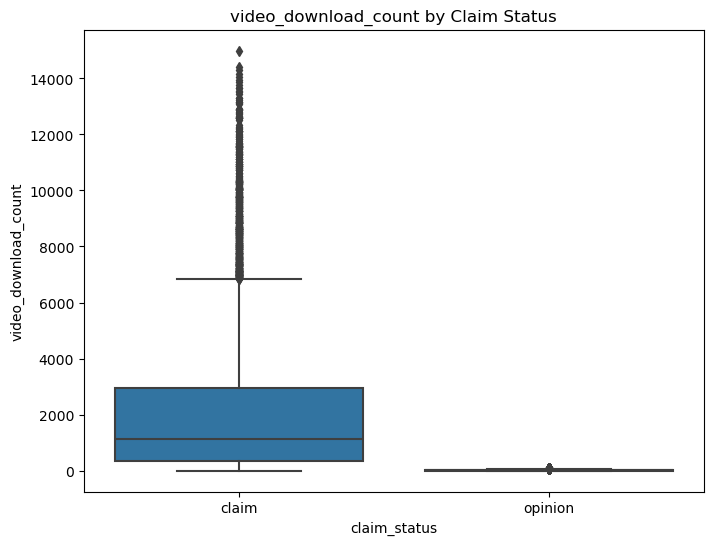

In [76]:
#6c:Stratified box plot of 'video_download_count'
plt.figure(figsize=(8, 6))
sns.boxplot(x='claim_status', y='video_download_count', data=data)
plt.title('video_download_count by Claim Status')
plt.show()

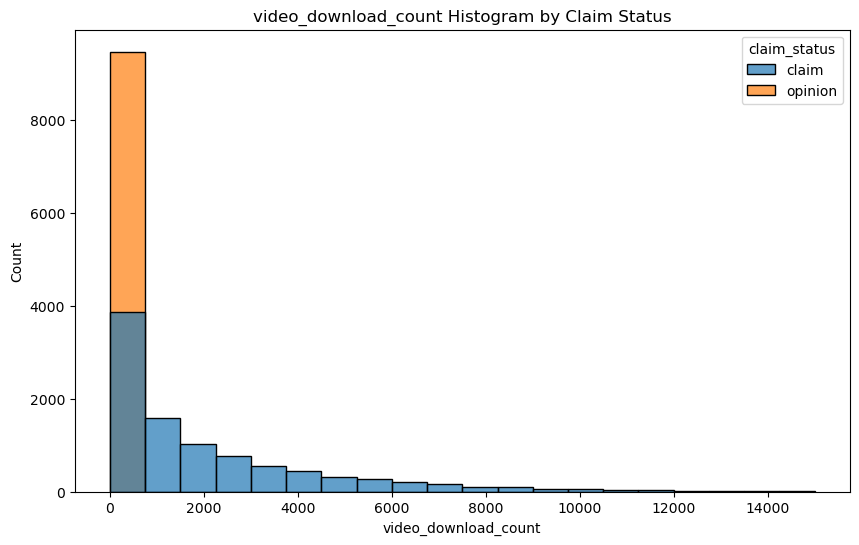

In [77]:
# 6d:Stratified histogram (overlaid) of 'video_download_count'
plt.figure(figsize=(10, 6))
# Changed bins to an integer (20) to let Seaborn auto-detect the range
sns.histplot(data=data, x='video_download_count', hue='claim_status', bins=20, multiple='layer', alpha=0.7)
plt.title('video_download_count Histogram by Claim Status')
plt.show()

### Video download Count: Stratified Analysis & Modeling Implication
video_download_count` shows **strong class separation**, continuing the pattern across all engagement metrics:
- Low-download videos are overwhelmingly opinions.
- High-download videos (>2,000 downloads) are predominantly claims.
**Conclusion**: Valuable predictor — retain for modeling.

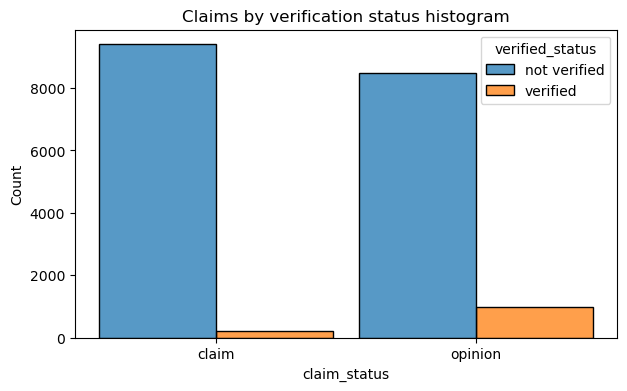

In [78]:
#  Categorical Variable: Claim status by verification status
plt.figure(figsize=(7,4))
sns.histplot(data=data,
x='claim_status', hue='verified_status', multiple='dodge', shrink=0.9)
plt.title('Claims by verification status histogram');

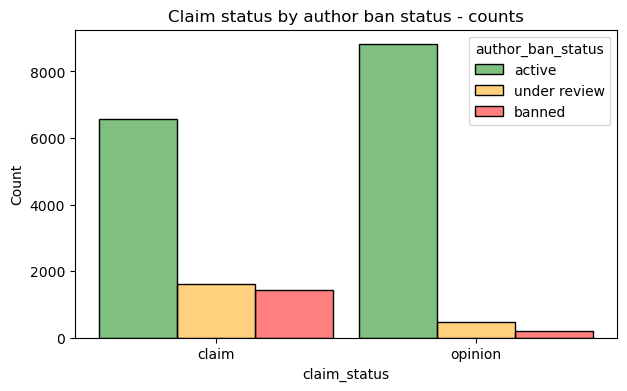

In [88]:
# Categorical Variable: Claim status by author ban status
plt.figure(figsize=(7,4))

sns.histplot(
    data=data,                                      # Specified data=data
    x='claim_status', 
    hue='author_ban_status',
    multiple='dodge', 
    hue_order=['active', 'under review', 'banned'], 
    shrink=0.9,
    palette={'active':'green', 'under review':'orange', 'banned':'red'}, # Fixed the typo here
    alpha=0.5
)

plt.title('Claim status by author ban status - counts')
plt.show()

### Categorical Variables: verified_status & author_ban_status

#### Verified Status by Claim Status
- **Claim videos**: Almost entirely from non-verified authors (very small orange sliver for verified).
- **Opinion videos**: Predominantly non-verified, but slightly higher proportion of verified authors compared to claims.

Verified status shows **weak association** with claim_status — most videos (both classes) come from non-verified authors.

#### Author Ban Status by Claim Status
- **Claim videos**: Significant proportion from banned (red) and under-review (orange) authors; active (green) still majority but reduced.
- **Opinion videos**: Overwhelmingly from active authors (green); banned/under-review almost negligible.

**Strong association**: Authors posting claim videos are far more likely to be under review or banned.

#### Insights & Modeling Implication
- `verified_status`: Low discriminatory power — majority non-verified across both classes. Likely low feature importance; consider excluding.
- `author_ban_status`: High discriminatory power — banned/under-review authors disproportionately post claims. This aligns with moderation patterns (claim content more likely flagged).

**Conclusion**:
- Retain `author_ban_status` as a strong categorical predictor (one-hot encode for modeling).
- `verified_status` adds minimal signal — deprioritize or drop to reduce noise.

These categorical features complement engagement metrics: claim videos not only get higher interaction but also come from riskier authors.

**Part 3:** Evaluate and share results

In [91]:
# Determining outliers
#When building predictive models, the presence of outliers can be problematic. 
#For example, if you were trying to predict the view count of a particular video, videos with extremely high view counts might 
#introduce bias to a model. Also, some outliers might indicate problems with how data was captured or recorded.

count_cols = ['video_view_count',
'video_like_count',
'video_share_count',
'video_download_count',
'video_comment_count',
]
for column in count_cols:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    median = data[column].median()
    outlier_threshold = median + 1.5*iqr
    # Count the number of values that exceed the outlier threshold
    outlier_count = (data[column] > outlier_threshold).sum()
    print(f'Number of outliers, {column}:', outlier_count)

Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


### Outlier Detection in Engagement Metrics (IQR Method)

Applied modified IQR outlier detection using **median + 1.5 * IQR** threshold (more robust for skewed data than mean-based):

| Metric                | Outliers (> threshold) | % of Total Videos |
|-----------------------|------------------------|-------------------|
| video_view_count      | 2,343                 | 12.1%            |
| video_like_count      | 3,468                 | 17.9%            |
| video_share_count     | 3,732                 | 19.3%            |
| video_download_count  | 3,733                 | 19.3%            |
| video_comment_count   | 3,882                 | 20.0%            |

#### Key Insights
- **High outlier prevalence (12–20%)**: Expected for social media engagement — viral videos create extreme right-tail skew.
- **Strongest outlier concentration**: Comments, downloads, shares (~20% exceed threshold).
- **Views/likes slightly lower**: Still substantial, confirming "power-law" distribution.

#### Modeling Implication
- **Retain outliers**: They represent real viral/controversial claim videos — removing them would lose critical signal for classification.
- **Handle via transformations**: Log transformation (`np.log1p()`) will reduce skew without dropping data.
- **Robust models**: Tree-based methods (Random Forest, XGBoost) naturally handle outliers better than linear regression.

This confirms EDA findings: engagement metrics are heavily skewed, with outliers likely concentrated in claim videos (to be validated in stratified analysis).

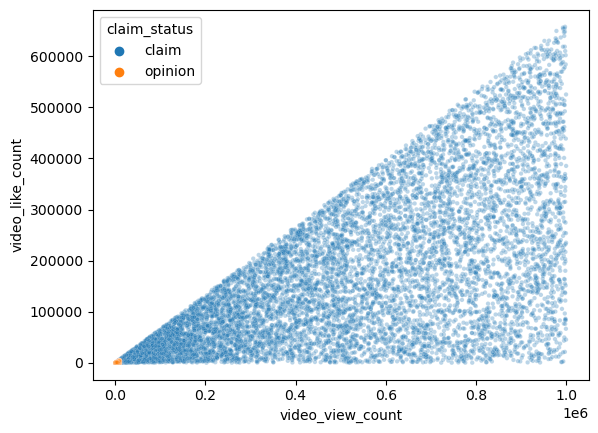

In [93]:
# Create a scatterplot of `video_view_count` versus `video_like_count`␣!according to 'claim_status'
sns.scatterplot(x=data["video_view_count"], y=data["video_like_count"],
hue=data["claim_status"], s=10, alpha=.3)
plt.show()

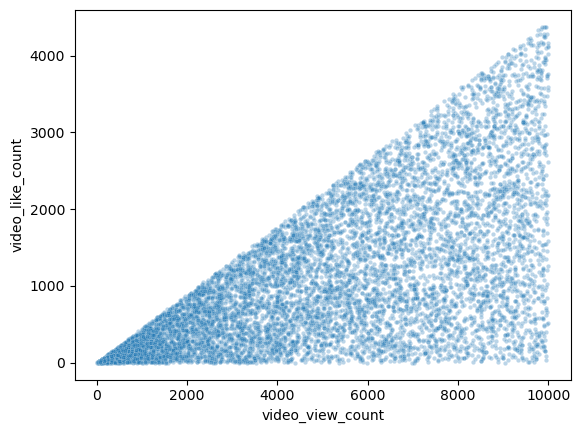

In [95]:
# Create a scatterplot of `video_view_count` versus `video_like_count` for !opinions only
opinion = data[data['claim_status']=='opinion']
sns.scatterplot(x=opinion["video_view_count"], y=opinion["video_like_count"],
s=10, alpha=.3)
plt.show()

### Bivariate Scatter: Video View Count vs. Video Like Count

#### All Videos (Colored by Claim Status)
- Strong positive linear relationship: higher views strongly correlate with higher likes.
- **Claim videos** (blue) dominate the upper-right region (high views + high likes).
- **Opinion videos** (orange) are clustered in the lower-left (low views + low likes), with very few breaking into high ranges.

The separation is stark — the "viral" cloud (high engagement) is almost entirely claims.

#### Opinion Videos Only
- Even within opinions, likes increase with views (positive correlation).
- However, the entire cloud is compressed to very low ranges (views <10k, likes <4k).
- No opinion videos reach the high-engagement zone.

#### Insights & Modeling Implication
- Likes and views are highly collinear (expected — more views = more opportunity to like).
- The relationship holds within each class, but **class separation is driven by scale**: claim videos achieve much higher absolute engagement.
- Engineered ratio `likes_per_view` will capture **engagement intensity** (likes per exposure) and likely provide cleaner separation than raw counts.

**Conclusion**: Raw `video_like_count` is redundant with `video_view_count` but reinforces the pattern. Prioritize `video_view_count` and `likes_per_view` for modeling to avoid multicollinearity while retaining predictive power.

### EDA Summary & Key Takeaways

Exploratory data analysis reveals clear and consistent patterns distinguishing **claim** videos from **opinion** videos:

- **Engagement metrics** (`video_view_count`, `video_like_count`, `video_share_count`, `video_download_count`, `video_comment_count`) show **extreme class separation**:
  - Claim videos receive dramatically higher interaction across all metrics (~100× higher median views, substantial differences in likes, shares, downloads, and comments).
  - High-engagement tail (viral content) is almost exclusively composed of claim videos.
  - Opinion videos remain clustered at low engagement levels.

- **Engineered ratios** (e.g., `likes_per_view`, `shares_per_view`) reinforce higher engagement intensity for claims even after normalizing for views.

- **Author ban status**: Strong association — banned or under-review authors disproportionately post claim videos (28% of claims vs. 7% of opinions).

- **Weak or non-predictive features**:
  - `video_duration_sec`: Nearly identical distributions (driven by platform limits).
  - `verified_status`: Minimal difference (most videos non-verified).

- **Outliers**: High prevalence (12–20%) in engagement metrics — represent real viral behavior and should be retained (handle via log transformation or tree-based models).

**Final Feature Recommendations for Modeling**:
| Feature Group              | Strength       | Recommendation                  |
|----------------------------|----------------|---------------------------------|
| video_view_count           | Very High      | Primary predictor (log transform) |
| likes/shares/downloads_per_view | High           | Keep engineered ratios          |
| author_ban_status          | High           | One-hot encode                  |
| video_like/share/comment/download_count | High (collinear with views) | Secondary or drop to avoid multicollinearity |
| video_duration_sec         | Low            | Exclude                         |
| verified_status            | Low            | Exclude                         |

These insights align with the business goal: claim videos drive higher visibility and interaction, likely due to controversial nature and algorithmic amplification.

EDA complete — findings will guide hypothesis testing, feature selection, and model development in subsequent phases.